In [1]:
import numpy as np
import pydoc
import simcalc
import scipy.io
import time

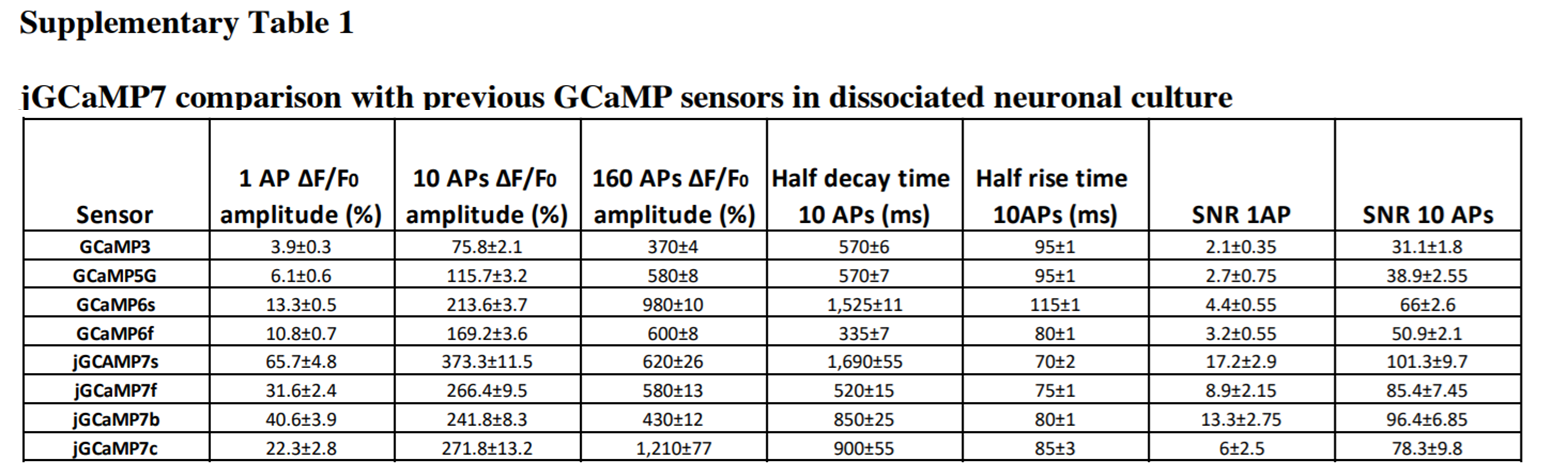

In [2]:
### GCaMP7b dynamics
start_time = time.time()
A = 1
# define other inputs
frames = 1000

h = 488 # height and width of field of view
dt= 1/32 # timestep
cycles = 2 # how many stimulus cycles
T = frames/2*dt/cycles # final time, so the total number of frames is cycles*2*T/dt



N = 18 ### Total number of samples

# run model
Video = np.zeros((N, h, h, frames), dtype=np.uint8) ### Data with noise
Data = np.zeros((N, h, h, frames), dtype=np.uint8) ### Data without noise
Masks = np.zeros((N, h, h, 350), dtype=np.uint8) ### Segmentation ground truth
Traces = np.zeros((N, 350, frames), dtype=np.float32) ### Neuron traces

nCells = np.random.randint(low=150, high=350, size=N)
print(nCells.shape)
scipy.io.savemat('nCells_GCaMP7b.mat', mdict={'nCells_GCaMP7b':nCells}) ### Data with noise
taur =  np.random.normal(loc=80e-3, scale=1e-3, size=N)
print(taur.shape)
scipy.io.savemat('taur_GCaMP7b.mat', mdict={'taur_GCaMP7b':taur}) ### Data with noise
taud = np.random.normal(loc=850e-3, scale=25e-3, size=N)
print(taud.shape)
scipy.io.savemat('taud_GCaMP7b.mat', mdict={'taud_GCaMP7b':taud}) ### Data with noise

for i in range(18):
    print('Sample ', i+1)
    p = [0.85, -0.006]
    rates = np.linspace(0.3,0.5,nCells[i])
    model = simcalc.SimCalc(h, nCells[i], T, cycles, dt)
    model.gen_calcium(taur[i],taud[i],A,p, rates=rates)
    #sp = model.sp # spikes
    model.gen_npil()
    model.gen_spat_kernels()
    model.gen_data(p)
    
    model.video = model.video.astype(np.float32)
    model.video = np.uint8(model.video / np.max(model.video) *225)
    model.data = model.data.astype(np.float32)
    model.data = np.uint8(model.data / np.max(model.data) *225)
    model.masks = np.array(model.masks)
    model.masks = model.masks.astype(np.uint8)    
    model.F = model.F.astype(np.float32)
    
    Video[i,:,:,:] = np.transpose(model.video,[1,2,0])
    Data[i,:,:,:] = np.transpose(model.data,[1,2,0])
    Masks[i,:,:,0:nCells[i]] = np.transpose(model.masks,[1,2,0])
    Traces[i,0:nCells[i],:] = model.F
    print("--- %s seconds ---" % (time.time() - start_time))

scipy.io.savemat('Simulation_Train_Video_GCaMP7b.mat',mdict={'Video_GCaMP7b':Video})
scipy.io.savemat('Simulation_Train_Data_GCaMP7b.mat',mdict={'Data_GCaMP7b':Data})
scipy.io.savemat('Simulation_Train_Masks_GCaMP7b.mat',mdict={'Masks_GCaMP7b':Masks})
scipy.io.savemat('Simulation_Train_Trace_GCaMP7b.mat',mdict={'Trace_GCaMP7b':Traces})

(18,)
(18,)
(18,)
Sample  1
--- 918.9273641109467 seconds ---
Sample  2
--- 2485.006739139557 seconds ---
Sample  3
--- 3654.9979798793793 seconds ---
Sample  4
--- 5515.974118232727 seconds ---
Sample  5
--- 6826.765852928162 seconds ---
Sample  6
--- 8091.734734535217 seconds ---
Sample  7
--- 9021.297222614288 seconds ---
Sample  8
--- 10413.010090827942 seconds ---
Sample  9
--- 11706.43581366539 seconds ---
Sample  10
--- 12900.420498132706 seconds ---
Sample  11
--- 13908.97181224823 seconds ---
Sample  12
--- 16040.427733659744 seconds ---
Sample  13
--- 18106.261724472046 seconds ---
Sample  14
--- 19724.297693252563 seconds ---
Sample  15
--- 21253.38991856575 seconds ---
Sample  16
--- 22914.342459201813 seconds ---
Sample  17
--- 24414.063331127167 seconds ---
Sample  18
--- 25311.77989077568 seconds ---
